___
# Projeto 2 CDados
___

O principal objetivo do Projeto 2 é prever uma variável principal em função de
demais outras variáveis que podem influenciar em seu comportamento.

## Variável Target: taxa de fertilidade per capita por país

## Variável Feature: número médio de anos de escola frequentados por todas as mulheres na idade 15-24 anos por país

https://www.gapminder.org/data/

In [72]:
#Imports
%matplotlib inline
import pandas as pd

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [73]:
#Leitura dos arquivos Excel
fertilidade = pd.read_excel('bebes_por_mulher.xlsx') #bebês por mulher

escolaridade_anos = pd.read_excel('anos_na_escola_mulheres15-24.xlsx') #anos na escola, mulheres 15-24
emissao_co2 = pd.read_excel('co2_emissions_tonnes_per_person.xlsx') #toneladas por pessoa
pib_capita = pd.read_excel('gdppercapita_us_inflation_adjusted.xlsx') #PIB per capita
expectativa_vida = pd.read_excel('life_expectancy_years.xlsx') # em anos
densidade_populacional = pd.read_excel('population_density_per_square_km.xlsx', index_col=None) #por km²
mortalidade_infantil = pd.read_excel('child_mortality_0_5_year_olds_dying_per_1000_born.xlsx') #0-5 por 1000
idh = pd.read_excel('hdi_human_development_index.xlsx') #Índice de desenvolvimento Humano
#emissão CO2

In [74]:
#Cada linha representa um país e as colunas representam o ano
densidade_populacional.head(4)

,country,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Aruba,211,213,216,223,232,243,255,268,281,...,576,575,574,573,572,572,571,570,569,568
1,Afghanistan,11.9,12,12.2,12.3,12.5,12.7,12.9,13.1,13.3,...,117,117,117,117,116,116,116,115,115,115
2,Angola,3.65,3.7,3.78,3.87,3.96,4.05,4.12,4.19,4.26,...,135,136,138,140,142,144,146,147,149,151
3,Anguilla,56.9,59.1,60.9,62.2,63.4,64.2,65,65.6,66,...,158,157,156,156,155,154,154,153,152,152


# Inner Join

In [75]:
#Construindo DF
fertilidade_index = fertilidade.set_index('country')

escolaridade_anos_index = escolaridade_anos.set_index('country')
emissao_co2_index = emissao_co2.set_index('country')
pib_capita_index = pib_capita.set_index('country')
expectativa_vida_index = expectativa_vida.set_index('country')
densidade_populacional_index = densidade_populacional.set_index('country')
mortalidade_infantil_index = mortalidade_infantil.set_index('country')
idh_index = idh.set_index('country')

In [76]:
df1 = fertilidade_index.join(escolaridade_anos_index, how='outer', lsuffix='_fertilidade', rsuffix='_escolaridade')
df1 = df1[['2008_fertilidade','2008_escolaridade']].copy()
df1.head()

,2008_fertilidade,2008_escolaridade
country,,
Afghanistan,6.04,1.77
Albania,1.65,10.70
Algeria,2.83,9.28
Andorra,NaN,15.40
Angola,6.24,5.16


In [77]:
df2 = df1.join(emissao_co2_index, how='outer')
df2 = df2[['2008_fertilidade','2008_escolaridade', 2008]].copy()
df2 = df2.rename(columns={2008: '2008_emissao co2'})

In [78]:
df3 = df2.join(pib_capita_index, how='outer')
df3 = df3[['2008_fertilidade','2008_escolaridade', '2008_emissao co2', 2008]].copy()
df3 = df3.rename(columns={2008: '2008_pib capita'})

In [79]:
df4 = df3.join(expectativa_vida_index, how='outer')
df4 = df4[['2008_fertilidade','2008_escolaridade', '2008_emissao co2', '2008_pib capita', 2008]].copy()
df4 = df4.rename(columns={2008: '2008_expectativa vida'})

In [80]:
df5 = df4.join(densidade_populacional_index, how='outer')
df5 = df5[['2008_fertilidade','2008_escolaridade', '2008_emissao co2', '2008_pib capita', '2008_expectativa vida', 2008]].copy()
df5 = df5.rename(columns={2008: '2008_densidade populacional'})

In [81]:
df6 = df5.join(mortalidade_infantil_index, how='outer')
df6 = df6[['2008_fertilidade','2008_escolaridade', '2008_emissao co2', '2008_pib capita', '2008_expectativa vida', '2008_densidade populacional', 2008]].copy()
df6 = df6.rename(columns={2008: '2008_mortalidade infantil'})

In [82]:
df = df6.join(idh_index, how='outer')
df = df[['2008_fertilidade','2008_escolaridade', '2008_emissao co2', '2008_pib capita', '2008_expectativa vida', '2008_densidade populacional', '2008_mortalidade infantil', 2008]].copy()
df = df.rename(columns={2008: '2008_idh'})
df.head(3)

,2008_fertilidade,2008_escolaridade,2008_emissao co2,2008_pib capita,2008_expectativa vida,2008_densidade populacional,2008_mortalidade infantil,2008_idh
country,,,,,,,,
Afghanistan,6.04,1.77,0.238,488.0,59.9,43.5,91.9,0.447
Albania,1.65,10.70,1.470,3930.0,78.0,109,14.4,0.729
Algeria,2.83,9.28,3.400,4400.0,74.2,14.8,28.3,0.720


ValueError: could not convert string to float: '17.6k'

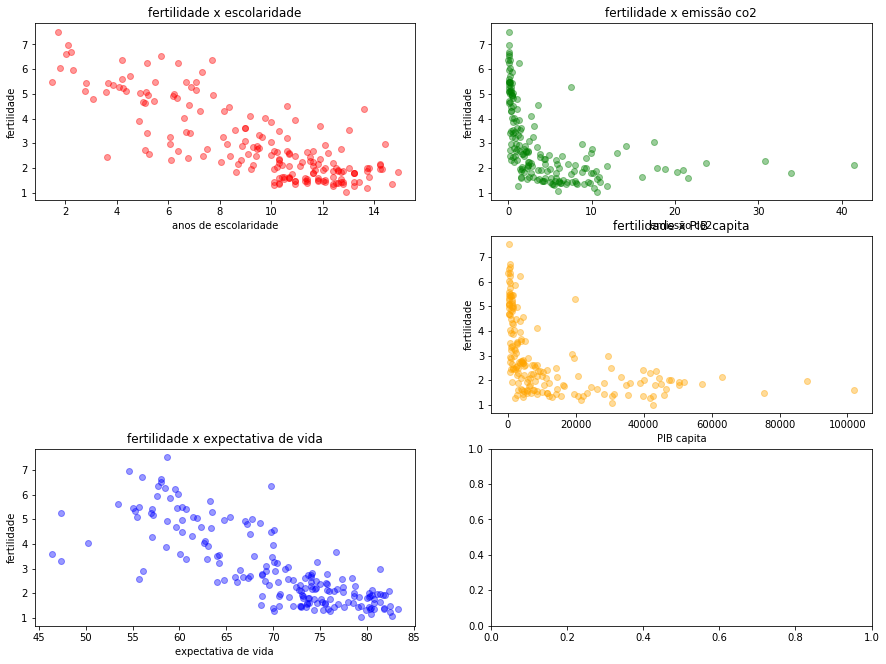

In [83]:
#Plota gráficos
fig = plt.figure(figsize=(15, 15)) #tamanho das figuras

plt.subplot(4, 2, 1) #quant de linhas, quant colunas e "índice"
plt.scatter(df['2008_escolaridade'], df['2008_fertilidade'], c='red', alpha=0.4)
plt.title('fertilidade x escolaridade')
plt.xlabel('anos de escolaridade')
plt.ylabel('fertilidade')

plt.subplot(4, 2, 2) 
plt.scatter(df['2008_emissao co2'], df['2008_fertilidade'], c='green', alpha=0.4)
plt.title('fertilidade x emissão co2')
plt.xlabel('emissão co2')
plt.ylabel('fertilidade')

plt.subplot(4, 2, 4)
plt.scatter(df['2008_pib capita'], df['2008_fertilidade'], c='orange', alpha=0.4)
plt.title('fertilidade x PIB capita')
plt.xlabel('PIB capita')
plt.ylabel('fertilidade')

plt.subplot(4, 2, 5) 
plt.scatter(df['2008_expectativa vida'], df['2008_fertilidade'], c='blue', alpha=0.4)
plt.title('fertilidade x expectativa de vida')
plt.xlabel('expectativa de vida')
plt.ylabel('fertilidade')

plt.subplot(4, 2, 6) 
plt.scatter(df['2008_densidade populacional'], df['2008_fertilidade'], c='red', alpha=0.4)
plt.title('fertilidade x densidade populacional')
plt.xlabel('densidade populacional')
plt.ylabel('fertilidade')

plt.subplot(4, 2, 7) 
plt.scatter(df['2008_mortalidade infantil'], df['2008_fertilidade'], c='green', alpha=0.4)
plt.title('fertilidade x mortalidade infantil')
plt.xlabel('mortalidade infantil')
plt.ylabel('fertilidade')

plt.subplot(4, 2, 8) 
plt.scatter(df['2008_idh'], df['2008_fertilidade'], c='blue', alpha=0.4)
plt.title('fertilidade x idh')
plt.xlabel('idh')
plt.ylabel('fertilidade')

plt.show()

In [84]:
#Correlação entre as variáveis features e a target
# ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
# ρ = 0,7 a 09 (positivo ou negativo): correlação forte;
# ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
# ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
# ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.


corr_fertilidade_escolaridade = df['2008_fertilidade'].corr(df['2008_escolaridade'])
print(f'Correlação entre fertildade e escolaridade é: {corr_fertilidade_escolaridade}')

corr_fertilidade_emissao_co2 = df['2008_fertilidade'].corr(df['2008_emissao co2'])
print(f'Correlação entre fertildade e emissão de co2 é: {corr_fertilidade_emissao_co2}')

corr_fertilidade_pib_capita = df['2008_fertilidade'].corr(df['2008_pib capita'])
print(f'Correlação entre fertildade e PIB per capita é: {corr_fertilidade_pib_capita}')

corr_fertilidade_expectativa_vida = df['2008_fertilidade'].corr(df['2008_expectativa vida'])
print(f'Correlação entre fertildade e expectativa de vida é: {corr_fertilidade_expectativa_vida}')

corr_fertilidade_densidade_populacional = df['2008_fertilidade'].corr(df['2008_densidade populacional'])
print(f'Correlação entre fertildade e densidade populacional é: {corr_fertilidade_densidade_populacional}')

corr_fertilidade_mortalidade_infantil = df['2008_fertilidade'].corr(df['2008_mortalidade infantil'])
print(f'Correlação entre fertildade e mortalidade infantil é: {corr_fertilidade_mortalidade_infantil}')

corr_fertilidade_idh = df['2008_fertilidade'].corr(df['2008_idh'])
print(corr_fertilidade_idh)
print(f'Correlação entre fertildade e IDH é: {corr_fertilidade_idh}')

Correlação entre fertildade e escolaridade é: -0.8056395759686067
Correlação entre fertildade e emissão de co2 é: -0.45559333546623065
Correlação entre fertildade e PIB per capita é: -0.47306779452084224
Correlação entre fertildade e expectativa de vida é: -0.7900145559235219


TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
#Filtros


In [ ]:
#FILTRAR ANTES E DEPOIS FAZER ISSO!

In [ ]:
df.head(3)

In [ ]:
fertilidade = df['2008_fertilidade'].describe()
fertilidade

In [ ]:
escolaridade = df['2008_escolaridade'].describe()

In [ ]:
emissao_co2 = df['2008_emissao co2'].describe()

In [ ]:
pib_capita = df['2008_pib capita'].describe()

In [ ]:
expectativa_vida = df['2008_expectativa vida'].describe()

In [ ]:
densidade_populacional = df['2008_densidade populacional'].describe()

In [ ]:
mortalidade_infantil = df['2008_mortalidade infantil'].describe()

In [ ]:
idh = df['2008_idh'].describe()